In [1015]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
import emoji

from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.manifold import TSNE
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from nltk import word_tokenize
from bs4 import BeautifulSoup

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.corpus import brown,words
from nltk.tag import pos_tag
from textblob import TextBlob


import eli5
import re, string
from string import punctuation

#pd.set_option('display.max_colwidth', None)



plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.options.display.float_format = '{:20,.10f}'.format # suprimimos la notacion cientifica en los outputs

SMALL_SIZE = 8
MEDIUM_SIZE = 11
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (9, 6)


# Funciones Generales

In [1338]:
CODE_LOCATION = {'al': 'alabama',
  'ak': 'alaska',
  'az': 'arizona',
  'ar': 'arkansas',
  'ca': 'california',
  'co': 'colorado',
  'ct': 'connecticut',
  'de': 'delaware',
  'dc': 'district of columbia',
  'fl': 'florida',
  'ga': 'georgia',
  'hi': 'hawaii',
  'id': 'idaho',
  'il': 'illinois',
  'in': 'indiana',
  'ia': 'iowa',
  'ks': 'kansas',
  'ky': 'kentucky',
  'la': 'louisiana',
  'me': 'maine',
  'md': 'maryland',
  'ma': 'massachusetts',
  'mi': 'michigan',
  'mn': 'minnesota',
  'ms': 'mississippi',
  'mo': 'missouri',
  'mt': 'montana',
  'ne': 'nebraska',
  'nv': 'nevada',
  'nh': 'new hampshire',
  'nj': 'new jersey',
  'nm': 'new mexico',
  'ny': 'new york',
  'nc': 'north carolina',
  'nd': 'north dakota',
  'oh': 'ohio',
  'ok': 'oklahoma',
  'or': 'oregon',
  'pa': 'pennsylvania',
  'ri': 'rhode island',
  'sc': 'south carolina',
  'sd': 'south dakota',
  'tn': 'tennessee',
  'tx': 'texas',
  'ut': 'utah',
  'vt': 'vermont',
  'va': 'virginia',
  'wa': 'washington',
  'wv': 'west virginia',
  'wi': 'wisconsin',
  'wy': 'wyoming',
  'as': 'american samoa',
  'gu': 'guam',
  'mh': 'marshall islands',
  'fm': 'micronesia',
  'mp': 'northern marianas',
  'pw': 'palau',
  'u.s.a': 'united states',
  'usa': 'united states',
  '304': 'west virginia',
  'd.c': 'district of columbia',
  'd.c.': 'district of columbia',                 
  'us': 'united states',
  'ny': 'new york',
  'nyc': 'new york',
  'uk': 'united kingdom',
  'u.k': 'united kingdom',
  'u.k.': 'united kingdom',
  'bc': 'british columbia',
  'ab': 'alberta',
  'vi': 'virgin islands'}




#Imprimir metricas de las predicciones
def mostrar_metricas(y_test, y_pred):
    print('Reporte de clasificación: \n', classification_report(y_test, y_pred))
    print('Matriz de confusión: \n',confusion_matrix (y_test, y_pred))
    print('ROC: \n', metrics.roc_auc_score(y_test, y_pred))

    # Obtener y reformar la matriz de datos de 
    matrix = confusion_matrix (y_test, y_pred) 
    matrix = matrix.astype ('float') / matrix.sum (axis = 1) [:, np.newaxis] 

    # Build the plot
    plt.figure()
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},cmap=plt.cm.Greens, linewidths=0.2)
    plt.xlabel('Predicción')
    plt.ylabel('Target')
    plt.title('Matriz de confusión')
    plt.show()
    
def grafico_pie(df, titulo, valores, etiquetas):
    fig = px.pie(df, values=valores, names=etiquetas)
    fig.update_layout(title_text=titulo,
                      template="plotly_white")
    fig.show()
    
def grafico_distr(df, columna, titulo, xtitulo, ytitulo):
    x1 = df.loc[df['target'] == 1][columna]
    x2 = df.loc[df['target'] == 0][columna]
    group_labels = ['Verdadero', 'Falso']
    colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']
    fig = ff.create_distplot([x1, x2], group_labels,colors=colors)
    fig.update_layout(title_text=titulo,
                      xaxis_title=xtitulo,
                      yaxis_title=ytitulo,
                      template="plotly_white")
    fig.show()
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


def resultados(pred, test_df):
    res_df=pd.DataFrame(test_df['id'])
    res_df['target']=pred
    res_df.to_csv('data/submission.csv', index=False)
    


stops = set(stopwords.words('english'))
#punctuation = list(string.punctuation)
punctuation = '!"$%&\()*+,-/:;<=>?[\\]“”^_`#{|}~’'


word_list = brown.words()
word_set = set(word_list)


def unir_texto(text):
    return ( ' '.join(text))

def eliminar_palabras_con(text, con):
    palabras = []
    for word in text.split():
        if con not in word:
            palabras.append(word)
    return unir_texto(palabras)


# Tipo de palabra
#https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#Lematizar palabras
englishStemmer=SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

#Elimino stops words 
def eliminar_sw(text):
    final_text = []
    for i in text.split():
        if i.strip() not in stops: 
            #pos = pos_tag([i.strip()])
            #word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(i.strip())
    return unir_texto(final_text)

def lematizar(text):
    final_text = []
    for i in text.split():
        pos = pos_tag([i.strip()])
        word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
        final_text.append(word)
    return unir_texto(final_text)

def minusculas(text):
    return text.lower()

def eliminar_nums(text):
    cadena = []
    for x in text:
         if x not in string.digits:
                cadena.append(x)
    return  ''.join(cadena)

def eliminar_punct(text):
    cadena = []
    for x in text:
         if x not in punctuation:
                cadena.append(x)
    return  ''.join(cadena)
        
def eliminar_espacios_multiples(text):
    text = re.sub(r"\s+"," ", text, flags = re.I)
    return text.strip()

def eliminar_palabras_con_numeros(text):
    return re.sub(r'\w*\d\w*', '', text).strip()

def eliminar_cortas(text):
    cadena = []
    for word in text.split():
        if len(word) > 1:
            cadena.append(word)
    return  ' '.join(cadena)

def convertir_location_code(text):
    cadena = []
    for word in text.split():
        if word in CODE_LOCATION:
            word = CODE_LOCATION[word]
        cadena.append(word)
    return  ' '.join(cadena)

def reemplazar_chars(text):
    text = text.replace('&amp;','and')
    text = text.replace('&gt;&gt;',' view ')
    text = text.replace('&gt;',' ')
    text = text.replace('&lt;',' ')
    text = text.replace('mph','miles per hour')
    text = text.replace('rcmp','royal canadian mounted police')
    text = text.replace(' tch','trans canada highway')
    text = text.replace('lmfao','laughing my fucking ass off')
    text = text.replace('pkwy','park way')
    text = text.replace('hwy','high way')
    text = text.replace(' gov ',' government ')
    text = text.replace('govt','government')
    text = text.replace('gov\'t','government')

    
    text = text.replace('-',' ')
    text = text.replace('_',' ')
    text = text.replace('û',' ')
    text = text.replace('÷',' ')
    text = text.replace('û',' ')

    text = text.replace('friend50','friend')
    text = text.replace('offr','officer')
    text = text.replace('pkk','kurdistan workers party')
    text = text.replace('v deo','video')
    text = text.replace(' rly','really')
    text = text.replace('i\'m','i am')
    text = text.replace(' dont ',' do not ')
    text = text.replace('don\'t','do not')
    text = text.replace(' don t','do not')
   
    
    text = text.replace('it\'s','it is')
    text = text.replace('you\'re','you are')
    text = text.replace('i\'ve','i have')
    text = text.replace('there\'s ','there is ')
    text = text.replace('i\'ll ','i will ')
    text = text.replace('doesn\'t','does not')
    text = text.replace('i\'d','i had')
    text = text.replace('didn\'t','did not')
    text = text.replace('we\'re','we are')
    text = text.replace('they\'re','they are')
    text = text.replace('isn\'t','is not')
    text = text.replace('what\'s','what is')
    text = text.replace('let\'s','let us')
    text = text.replace('ain\'t','am not')
    text = text.replace('that\'s','that is')
    text = text.replace('won\'t','will not')
    text = text.replace('wasn\'t','was not')
    text = text.replace('hasn\'t','has not')
    text = text.replace('haven\'t','have not')
    text = text.replace('here s','here is')
    text = text.replace('aren\'t','are not')
    text = text.replace('you\'ll','you will')
    text = text.replace('it\'s','it is')
    text = text.replace('you\'re','you are')
    text = text.replace('shouldn\'t','should not')
    text = text.replace('should\'ve','should have')

    text = text.replace('here\'s','here is it')
    text = text.replace('we\'ve','we have')
    text = text.replace('you\'ve','you have')
    text = text.replace('who\'s','who is')
    text = text.replace('y\'all','you all')
    text = text.replace('wouldn\'t','would not')
    text = text.replace('they\'ve','they have')
    text = text.replace('weren\'t','were not')
    text = text.replace('would\'ve','would have')
    text = text.replace('you\'d','you would')
    text = text.replace('they\'ll','they will')
    text = text.replace('we\'d','we would')
    text = text.replace('they\'d','they would')
    text = text.replace('we\'ll','we shall')
    text = text.replace('it\'ll','it will')
    text = text.replace('what\'s','what is')
    text = text.replace('can\'t','can not')
    text = text.replace('can t ','can not ')
    text = text.replace(' he\'s',' hi is')
    text = text.replace('hasn\'t','has not')
 #   text = text.replace('\'s','')
    text = text.replace(' u ',' you ')
 #   text = text.replace(' s ',' ')
    text = text.replace('we ll','well')
    text = text.replace(' i m ',' i am ')


    

    text = text.replace('1st','first')
    text = text.replace('2nd','second')
    text = text.replace('3rd','third')
    text = text.replace('4th','fourth')
    text = text.replace('5th','fourth')
    text = text.replace('6th','fourth')
    text = text.replace('7th','fourth')
    text = text.replace('lol ','')
    text = text.replace(' lol','')
    text = text.replace(' lol ','')
    text = text.replace(' rt','')
    text = text.replace(' rt ','')
    text = text.replace('u.s.','united states')
    text = text.replace('u.s','united states')
    text = text.replace('d.c.','district of columbia')
    text = text.replace('b.c.','british columbia')


    text = text.replace('16yr','sixteen years')
    text = text.replace('fvck','fuck')
    text = text.replace('p.m.','post meridiem')
    text = text.replace(' pm ',' post meridiem ')
    text = text.replace('a.m.','ante meridiem')
    text = text.replace(' a.m ',' ante meridiem ')
    text = text.replace(' rn ',' right now ')
    text = text.replace(' da ',' the ')
    text = text.replace(' min ',' minutes ')
 #   text = text.replace(' \' ','\' ')

 
    return text
def eliminar_palabras_especiales(text):
    text = eliminar_palabras_con(text, 'http')
    text = eliminar_palabras_con(text, '@')
    #text = eliminar_palabras_con(text, '#')
    text = eliminar_palabras_con(text, 'mmm')
    text = eliminar_palabras_con(text, 'mhm')
    text = eliminar_palabras_con(text, 'ww')
    text = eliminar_palabras_con(text, 'jsj')
    text = eliminar_palabras_con(text, 'haha')
    text = eliminar_palabras_con(text, 'hah')
    text = eliminar_palabras_con(text, 'ooh')
    return text

def eliminar_char_espec(text):
    text = re.sub(r'[^-\s\'A-Za-z0-9]', '', text)
     #print(re.sub(r"[^a-zA-Z0-9]+", ' ', k))

    return text

def split_hashtag(text):
    cadena = []
    for w in text.split():
        if (w.startswith('#') & (len(w)> 4)):
            w = ' '.join(re.findall('[A-Z][^A-Z]*', w))
        cadena.append(w)
    return ' '.join(cadena)
    
def reemplazo_inicial(text):
    text = text.replace('%20', ' ')
    text = text.replace('Rly', 'really')
    text = text.replace('RT ', 'retweet ')
    text = text.replace(' RT ', ' retweet ')
    text = text.replace('Û', '\'')
    return text

def formato_inicial(df):
    df['location'].fillna(value='', inplace=True)
    df['keyword'].fillna(value='', inplace=True)
    
    #Minúsculas
    df['keyword_clean'] = df.keyword.str.replace('%20', ' ')
    df['location_clean'] = df.location.str.replace('%20', ' ')
    df['text_clean'] = df.text.apply(reemplazo_inicial)
    
    df['keyword'] = df.keyword_clean.str.lower()
    #Antes de poner en minúsculas hago split de los hashtags
    df['text_clean'] = df.text_clean.apply(split_hashtag)   
    df['text_clean'] = df.text_clean.str.lower()
    df['location_clean'] = df.location_clean.str.lower()

    
    #Sobre location
    df['location_clean'] = df.location_clean.str.lower()
    df['location_clean'] = df.location_clean.apply(convertir_location_code)
    df['location_clean'] = df.location_clean.apply(eliminar_char_espec)
    df['location_clean'] = df.location_clean.apply(eliminar_punct)
    df['location_clean'] = df.location_clean.apply(eliminar_palabras_con_numeros)
    df['location_clean'] = df.location_clean.apply(eliminar_cortas)
    df['location_clean'] = df.location_clean.apply(eliminar_palabras_especiales)


    
    #Sobre text_clean
    df['text_clean'] = df.text_clean.apply(eliminar_palabras_especiales) #Links, @user, etc
    df['text_clean'] = df.text_clean.apply(eliminar_char_espec)
    df['text_clean'] = df.text_clean.apply(reemplazar_chars) #1st por first, etc.
    df['text_clean'] = df.text_clean.str.replace('\'', '')

   # df['text_clean'] = df.text_clean.apply(eliminar_punct)
   #df['text_clean'] = df.text_clean.apply(eliminar_palabras_con_numeros)
   # df['text_clean'] = df.text_clean.apply(eliminar_sw) 
   # df['text_clean'] = df.text_clean.apply(lematizar) 
    df['text_clean'] = df.text_clean.apply(eliminar_espacios_multiples)
   # df['text_clean'] = df.text_clean.apply(eliminar_cortas)
    


# Carga de datos

In [1339]:
#train_df[train_df.target == 0]['location'].str.split(expand=True).stack().value_counts().to_csv('data/sample0.csv')
#train_df[train_df.target == 1]['location'].value_counts().to_csv('data/sample1.csv')
#cols= ['word_lenght']
#df = pd.get_dummies(train_df, columns=cols, drop_first=True)


train_df = pd.read_csv('data/train.csv', encoding='utf-8')
test_df = pd.read_csv('data/test.csv', encoding='utf-8')
train_df = train_df.sample(frac=1)
formato_inicial(train_df)
#formato_inicial(test_df)

In [1341]:
#train_df[train_df.text_clean.str.contains('\'')]['text_clean'].str.split(expand=True).stack().value_counts().to_csv('data/sample.csv')
#train_df.sample(2)
#train_df[train_df.location_clean.str.contains('')]['location_clean'].value_counts().to_csv('data/location.csv')
#train_df[train_df.text_clean.str.contains('')]['text_clean'].str.split(expand=True).stack().value_counts().to_csv('data/textss.csv')
#train_df[train_df.text.str.contains('Û')].sample(10)
train_df[train_df.text.str.contains('#')].sample(10)

#train_df.sample(10)


,id,keyword,location,text,target,keyword_clean,location_clean,text_clean
6529,9339,survive,,#Autoinsurance industry clueless on #driverlesscars : #Markets : #Money Times http://t.co/YdEtWgRibk,0,survive,,autoinsurance industry clueless on markets money times
7276,10415,whirlwind,Richardson TX,???? throwback Thurs ?? ???? Will You Still Love Me Tomorrow http://t.co/wmoyibWEc1 ?? @LucyMayOfficial ?? ?? #Whirlwind http://t.co/0rsverLzTm,0,whirlwind,richardson texas,throwback thurs will you still love me tomorrow whirlwind
3809,5411,first responders,,#LukeBox something about first responders/ military they are our true Hero's!! Besides your music,0,first responders,,luke box something about first responders military they are our true heros besides your music
5288,7555,outbreak,NJ/NYC,Wow-the name #LegionnairesDisease comes from an outbreak of pneumonia at the @AmericanLegion convention in Philly in 1976--29 died from it.,1,outbreak,njnyc,wow the name legionnaires disease comes from an outbreak of pneumonia at the convention in philly in 1976 29 died from it
400,577,arson,"Los Angeles, CA",Owner of Chicago-Area Gay Bar Admits to Arson Scheme http://t.co/0TSlQjOKvh via @theadvocatemag #LGBT,0,arson,los angeles california,owner of chicago area gay bar admits to arson scheme via l g b t
7174,10280,war zone,"New Hampshire, USA",#GrowingupBlack walking past chicken frying was like entering a war zone.,0,war zone,new hampshire united states,growingup black walking past chicken frying was like entering a war zone
116,168,aftershock,,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/e14EPzhotH | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/22a9D5DO6q,0,aftershock,,320 ir icemoon aftershock dubstep trap music dnb edm dance ices
1478,2129,catastrophe,,[reviews] #PixelsMovie not a catastrophe nor a funny movie... our review here : http://t.co/lVbUw01YOH,0,catastrophe,,reviews pixels movie not a catastrophe nor a funny movie our review here
5431,7750,police,,#World #News Qld police wrap Billy Gordon investigation: QUEENSLAND Police have wrapped up their investigation... http://t.co/msgnNDxOeK,1,police,,world news qld police wrap billy gordon investigation queensland police have wrapped up their investigation
4129,5870,hailstorm,"Iliff,Colorado",Severe hailstorm in progress over Northeast Logan County... #cowx http://t.co/XK9OwGV1O5,1,hailstorm,iliffcolorado,severe hailstorm in progress over northeast logan county



# Gráficos

In [886]:
#grafico_distr(train_df, 'cant_palabras', 'Gráfico de distr. de cantidad de palabras en text',  'Cantidad', '')
#grafico_distr(train_df, 'cant_caracteres','Gráfico de dist. de cantidad de caracteres en text', 'Cantidad', '')
#grafico_distr(train_df, 'cant_stopwords_pct','Gráfico de distr. porcentual de stopwords en text', 'Porcentaje', '')
#grafico_distr(train_df, 'cant_mayus_pct', 'Gráfico de distr. porcentual de mayúsculas en text','Porcentaje', '')
#grafico_pie(train_df, 'Porcentaje de tweets que contienen link', 'ref_noticias', 'target')
#grafico_distr(train_df, 'cant_numeros', 'Gráfico de distr. porcentual de mayúsculas en text','Cantidad', '')


# LSTM

Tokens únicos:  14541
Model: "sequential_231"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_216 (Embedding)    (None, 46, 100)           1454100   
_________________________________________________________________
spatial_dropout1d_141 (Spati (None, 46, 100)           0         
_________________________________________________________________
lstm_147 (LSTM)              (None, 64)                42240     
_________________________________________________________________
dense_288 (Dense)            (None, 2)                 130       
Total params: 1,496,470
Trainable params: 1,496,470
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
161/161 [==============================] - 15s 93ms/step - loss: 0.6097 - accuracy: 0.6613 - val_loss: 0.4955 - val_accuracy: 0.7776
Epoch 2/2
60/60 [==============================] - 1s 9ms/step - loss:

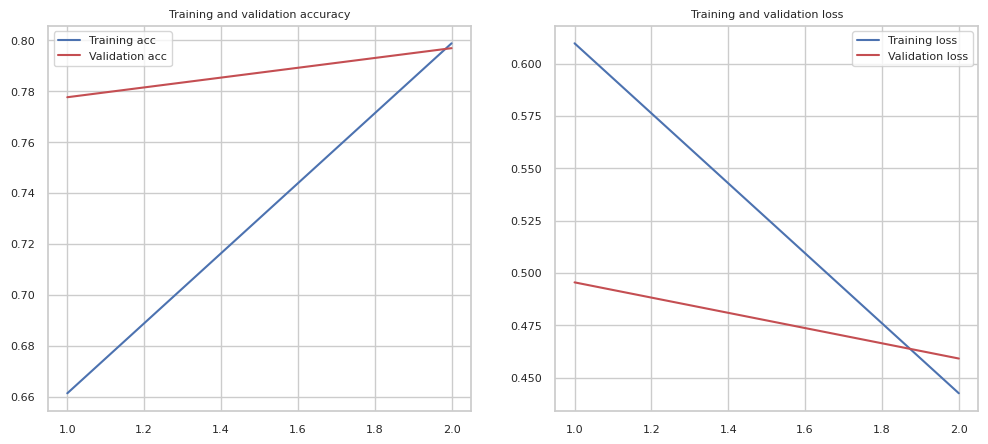

In [1342]:
# Cantidad máxima de palabras en text_clean
MAX_SEQUENCE_LENGTH = train_df['text_clean'].str.split().str.len().max() + 1

#Maximo de palabras
MAX_NB_WORDS = 2000

# Matriz de salida
EMBEDDING_DIM = 100

X = train_df['text_clean']
y = train_df['target']


tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X.values)

vocab_size = len(tokenizer.word_index) + 1  # Más una columna para el index
print('Tokens únicos: ', vocab_size)

X = tokenizer.texts_to_sequences(X.values)

X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
y = pd.get_dummies(y).values


# Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)


model = Sequential()
model.add(layers.Embedding(vocab_size, EMBEDDING_DIM ,input_length = X.shape[1]))
model.add(layers.SpatialDropout1D(0.6))
model.add(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


epochs = 2

batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',
                    patience=3, min_delta=0.0001)])

accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# RED CONVOLUCIONAL 1D

Tokens únicos:  13787
Epoch 1/3
161/161 [==============================] - 4s 24ms/step - loss: 0.6749 - accuracy: 0.6049 - val_loss: 0.5807 - val_accuracy: 0.7601
Epoch 2/3
161/161 [==============================] - 4s 28ms/step - loss: 0.4614 - accuracy: 0.8435 - val_loss: 0.4771 - val_accuracy: 0.8144
Epoch 3/3
60/60 [==============================] - 0s 6ms/step - loss: 0.4892 - accuracy: 0.7841
Test set
  Loss: 0.489
  Accuracy: 0.784
Training Accuracy: 0.9284
Testing Accuracy:  0.7841


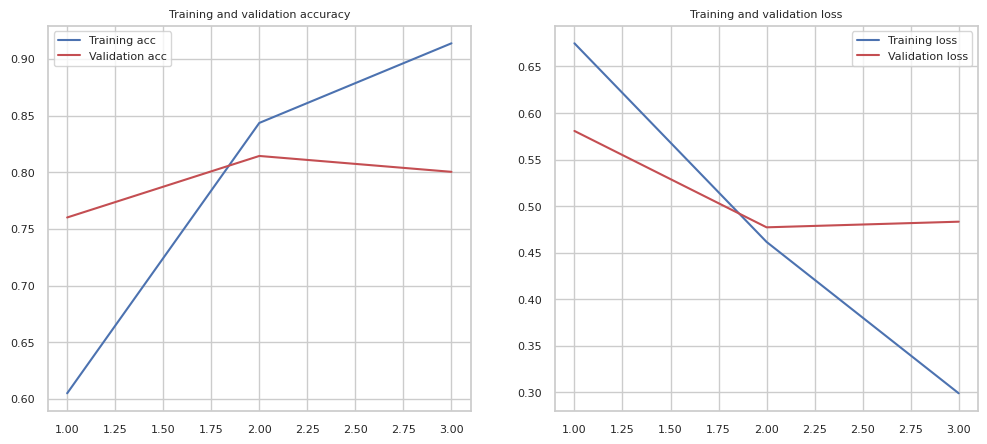

In [1165]:
# Cantidad máxima de palabras en text_clean
MAX_SEQUENCE_LENGTH = train_df['text_clean'].str.split().str.len().max() + 1

#Maximo de palabras
MAX_NB_WORDS = 2000

# Matriz de salida
EMBEDDING_DIM = 100
X = train_df['text_clean']
y = train_df['target']


tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X.values)

vocab_size = len(tokenizer.word_index) + 1  # Más una columna para el index
print('Tokens únicos: ', vocab_size)

X = tokenizer.texts_to_sequences(X.values)

X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
y = pd.get_dummies(y).values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

# Agrego unua red convolucional 1D
model = Sequential()
model.add(layers.Embedding(vocab_size, EMBEDDING_DIM ,input_length = X.shape[1]))
model.add(layers.Conv1D(200, 10, activation='sigmoid'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


epochs = 3
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',
                    patience=3, min_delta=0.0001)])

accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# B. MLP Classifier

Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      1107
           1       0.72      0.69      0.70       797

    accuracy                           0.76      1904
   macro avg       0.75      0.75      0.75      1904
weighted avg       0.76      0.76      0.76      1904

Matriz de confusión: 
 [[894 213]
 [248 549]]
ROC: 
 0.7482106000482841


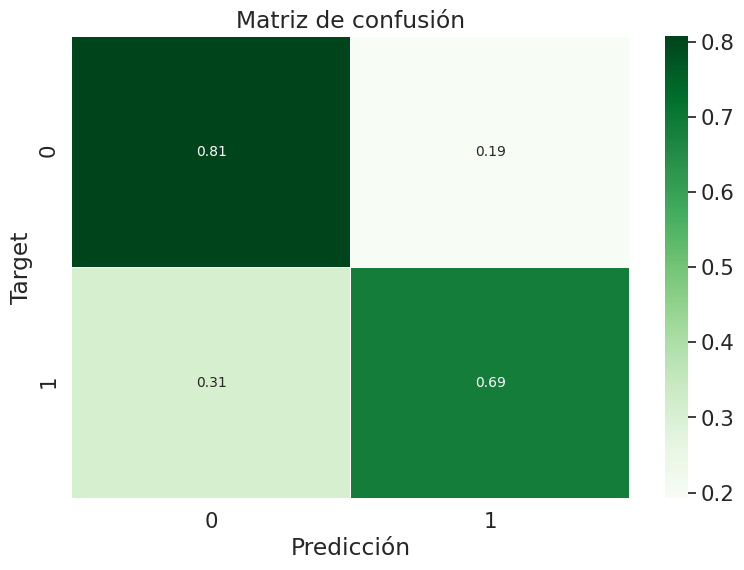

In [679]:
from sklearn.decomposition import PCA
from scipy.linalg import svd as scipy_svd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

X = train_df['text_clean']
y = train_df['target']

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Doc vs Term
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)

# transform  to a normalized tf-idf representation 
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train)
X_test = tfidf_transformer.transform(X_test)

MLP = MLPClassifier(activation='logistic', solver='adam',random_state=1)

MLP.fit(X_train, y_train)

#Predicciones
y_pred = MLP.predict(X_test)

#Métricas
mostrar_metricas(y_test, y_pred)



# C. Light GBM Classifier

Accu: 0.773 (0.014521)
Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      1107
           1       0.79      0.67      0.73       797

    accuracy                           0.79      1904
   macro avg       0.79      0.77      0.78      1904
weighted avg       0.79      0.79      0.79      1904

Matriz de confusión: 
 [[968 139]
 [260 537]]
ROC: 
 0.7741060367525465


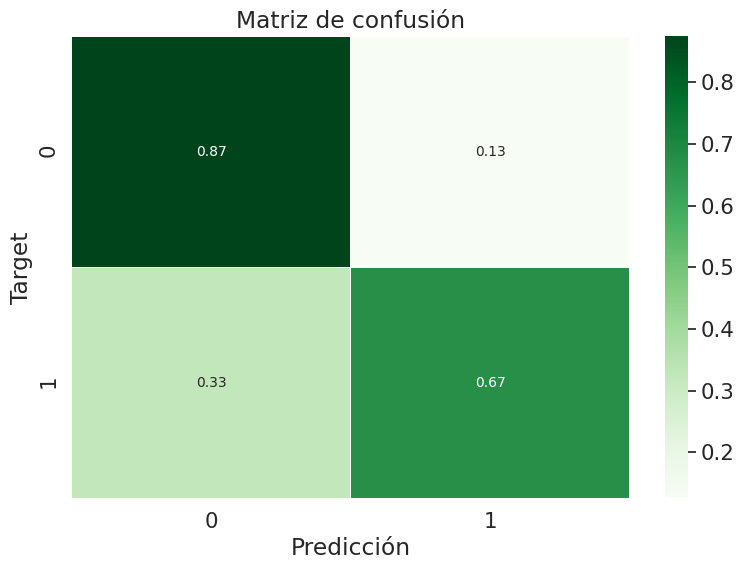

In [762]:
from lightgbm import LGBMClassifier

X = train_df['text_clean']
y = train_df['target']

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Doc vs Term
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)

# transform  to a normalized tf-idf representation 
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train)
X_test = tfidf_transformer.transform(X_test)


LGBM = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(LGBM, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accu: %.3f (%.6f)' % (np.mean(n_scores), np.std(n_scores)))

#Fit
LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train)

#Predicciones
y_pred = LGBM.predict(X_test)

#Métricas
mostrar_metricas(y_test, y_pred)


# 2. XGBoost - TEXT

Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.69      0.90      0.78      1107
           1       0.75      0.44      0.56       797

    accuracy                           0.71      1904
   macro avg       0.72      0.67      0.67      1904
weighted avg       0.72      0.71      0.69      1904

Matriz de confusión: 
 [[991 116]
 [443 354]]
ROC: 
 0.6696889532676171


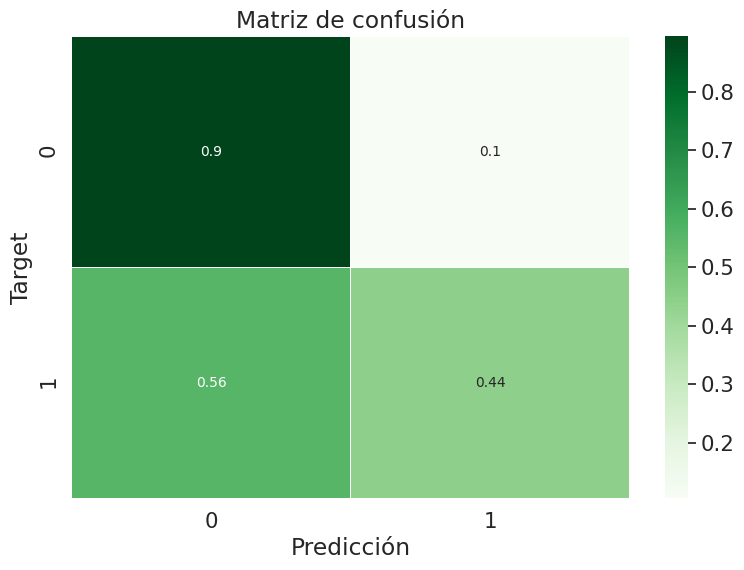

In [749]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier

X = train_df['text_clean']
y = train_df['target']

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Doc vs Term
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)

# TF-IDF
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train)
X_test = tfidf_transformer.transform(X_test)


#Entrenamiento
alg = XGBClassifier(learning_rate=0.1, n_estimators=20, max_depth=5,
                    min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                    objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

alg.fit(X_train, y_train, eval_metric='auc')

#Predicciones
y_pred = alg.predict(X_test)

#Métricas
mostrar_metricas(y_test, y_pred)

# 3.  Random Forest Classifier - TEXT

Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84      1468
           1       0.83      0.64      0.72      1045

    accuracy                           0.79      2513
   macro avg       0.80      0.77      0.78      2513
weighted avg       0.80      0.79      0.79      2513

Matriz de confusión: 
 [[1332  136]
 [ 381  664]]
ROC: 
 0.7713818233967381


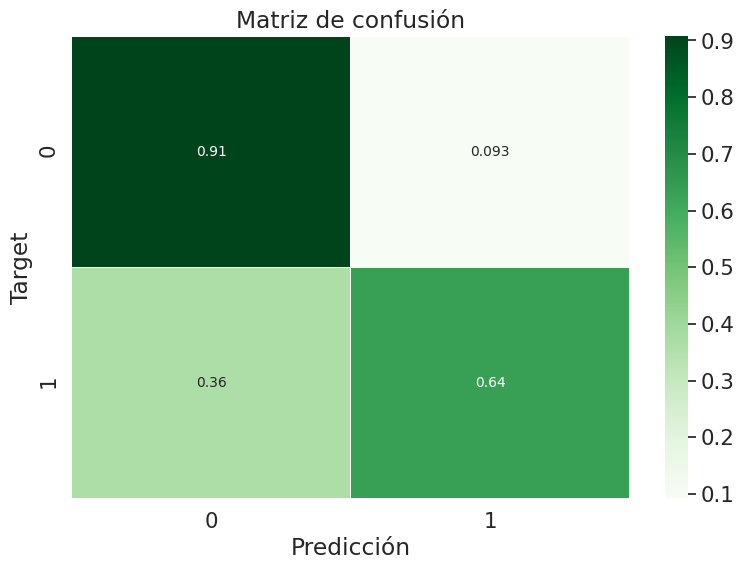

In [761]:
X = train_df['text_clean']
y = train_df['target']

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

# Doc vs Term
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)

# transform  to a normalized tf-idf representation 
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train)
X_test = tfidf_transformer.transform(X_test)


# Train
RFC = RandomForestClassifier(n_estimators=500, max_depth=131, class_weight = 'balanced',
                             criterion='entropy', max_features='auto', n_jobs=-1)


RFC.fit(X_train, y_train)

#Predict
y_pred = RFC.predict(X_test)

#Métricas
mostrar_metricas(y_test, y_pred)

#Features importances
#features = np.array(X.columns)
importances = RFC.feature_importances_

'''

#Buscando parámetros 'buenos'
param_grid = { 
    'n_estimators': [100, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,5,7,9,11, 13],
    'criterion' :['gini', 'entropy']
}

#Grid Search train
GSCV = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 5)
GSCV.fit(X_train, y_train)

# Best paramns
print(GSCV.best_params_)

'''
print('')

# 4. Regresión Logística - TEXT

In [688]:
from sklearn.model_selection import cross_val_score

X = train_df['text_clean']
y = train_df['target']

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Doc vs Term
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)

# TF-IDF
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train)
X_test = tfidf_transformer.transform(X_test)

#Entrenamiento

LR = LogisticRegression(C=1.3, solver='liblinear', penalty='l2', n_jobs=-1)
LR.fit(X_train, y_train)


#Métricas
y_pred = LR.predict(X_test)
mostrar_metricas(y_test, y_pred)

#Feature estimator
eli5.show_weights(estimator=LR,feature_names= list(count_vect.get_feature_names()),top=(20, 20))

[0.79509632 0.77758319 0.76882662 0.8056042  0.80035026 0.78633975
 0.78809107 0.80735552 0.79334501 0.77894737]


# 5. KNN - TEXT

Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.76      0.90      0.83      1107
           1       0.82      0.61      0.70       797

    accuracy                           0.78      1904
   macro avg       0.79      0.76      0.77      1904
weighted avg       0.79      0.78      0.78      1904

Matriz de confusión: 
 [[1000  107]
 [ 308  489]]
ROC: 
 0.7584465911576723


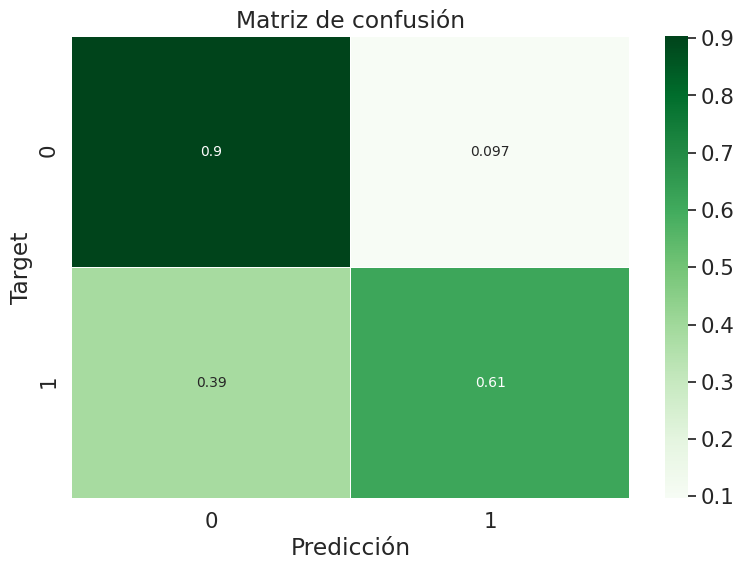

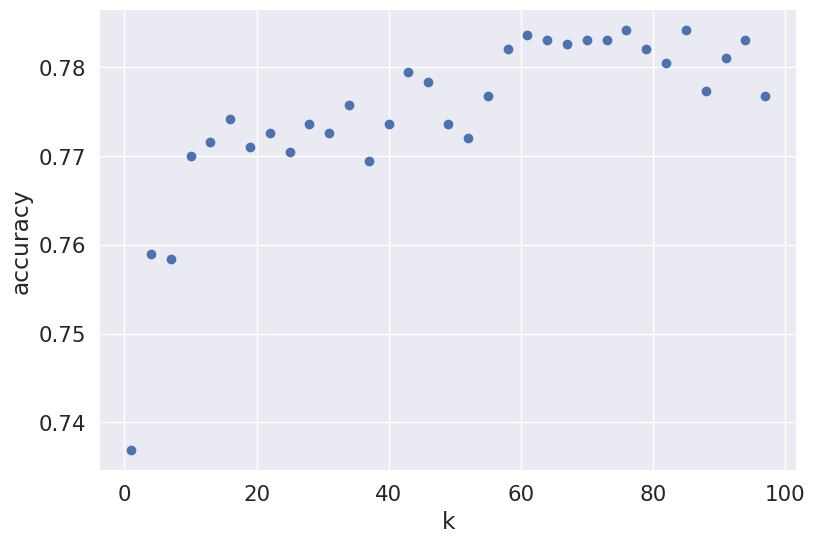

In [672]:
X = train_df['text_clean']
y = train_df['target']

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Doc vs Term
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)

# TF-IDF 
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train)
X_test = tfidf_transformer.transform(X_test)

#Train
KNN = KNeighborsClassifier(n_neighbors = 79, metric='minkowski')
KNN.fit(X_train, y_train)

#Métricas
y_pred = KNN.predict(X_test)
mostrar_metricas(y_test, y_pred)


#Buscando un K 'bueno'
k_range = range(1,100, 3)
scores = []


for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k, metric='minkowski')
    KNN.fit(X_train, y_train)
    scores.append(KNN.score(X_test, y_test))
   # accuracy = metrics.accuracy_score(y_test, y_pred) #Accuracy

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.show()



# 6. Multinomial NB - TEXT

Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.77      0.93      0.84      1107
           1       0.86      0.62      0.72       797

    accuracy                           0.80      1904
   macro avg       0.81      0.77      0.78      1904
weighted avg       0.81      0.80      0.79      1904

Matriz de confusión: 
 [[1024   83]
 [ 302  495]]
ROC: 
 0.7730508149916295


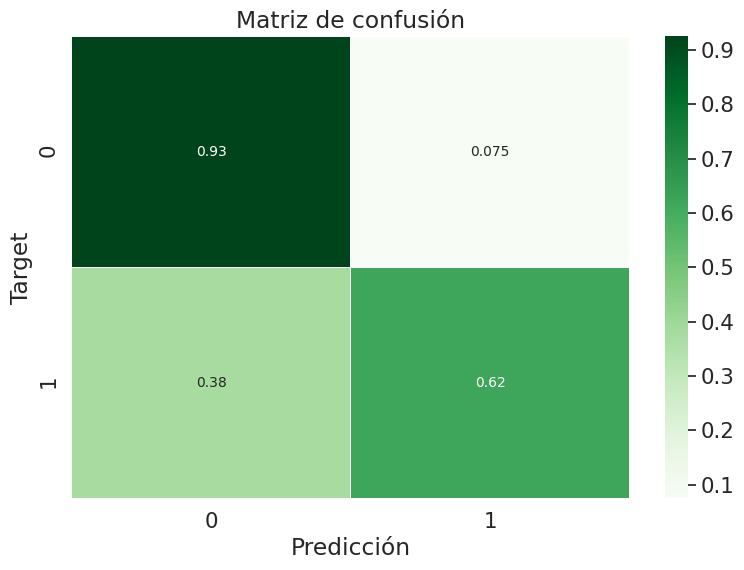

In [673]:
X = train_df['text_clean']
y = train_df['target']

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Doc vs Term
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)

# TF-IDF 
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train)
X_test = tfidf_transformer.transform(X_test)


# Train
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

#Predict
y_pred = MNB.predict(X_test)

#Métricas
mostrar_metricas(y_test, y_pred)